# IEEE-CIS Fraud Detection EDA 

<img src="https://i.ibb.co/WPcTTkw/finance-analysis.png" width=500 align="center">

# Introduction

# Contents

In [0]:
conda list

SyntaxError: ignored

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from sklearn.metrics import roc_auc_score
import gc

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploratory Data Analysis 

### Loading Data & Optimization of Memory

In [0]:
train_identity = pd.read_csv('../content/input/train_identity.csv')
train_transaction = pd.read_csv('../content/input/train_transaction.csv')
test_identity = pd.read_csv('../content/input/test_identity.csv')
test_transaction = pd.read_csv('../content/input/test_transaction.csv')

In [0]:
print(train_identity.shape)
print(train_transaction.shape)
print(test_identity.shape)
print(test_transaction.shape)

In [1]:
train_identity.head()

NameError: ignored

In [0]:
train_transaction.head()

In [0]:
train_transaction.shape

In [0]:
test_identity.head()

In [0]:
test_transaction.head()

In [0]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [0]:
train.head()

In [0]:
test.head() 

In [0]:
list(train.columns.values.tolist()) 

We have 433 columns <br> 
TransactionID - id of the row <br>
isFraud - determines if the transaction is a fraud <br> 
TransactionDT - transaction date time <br> 
ProductCD - product code, the product for each transaction <br> \
Card 1 - 6 - payment card information
Addr 1 & 2 - addresses 
dist1 & dist2 - distance?
P_emaildomain & R_emaildomain



In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.6+ GB


In [0]:
train.columns.get_loc("V1")

55

In [0]:
train.columns.get_loc("V339")

393

In [0]:
train.drop(train.iloc[:, 55:394], inplace = True, axis = 1)

In [0]:
test.drop(test.iloc[:, 55:394], inplace = True, axis = 1)

In [0]:
list(train.columns.values.tolist()) 

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

In [0]:
train_size_mb = train.memory_usage().sum() / 1024 / 1024
print("Train memory size: %.2f MB" % train_size_mb)
test_size_mb = test.memory_usage().sum() / 1024 / 1024
print("Test memory size: %.2f MB" % test_size_mb)

Train memory size: 432.52 MB
Test memory size: 367.25 MB


In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [0]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Memory usage of dataframe is 432.52 MB
Memory usage after optimization is: 98.68 MB
Decreased by 77.2%
Memory usage of dataframe is 367.25 MB
Memory usage after optimization is: 84.21 MB
Decreased by 77.1%


# Preprocessing 

Text(0.5, 1.0, 'Target variable count')

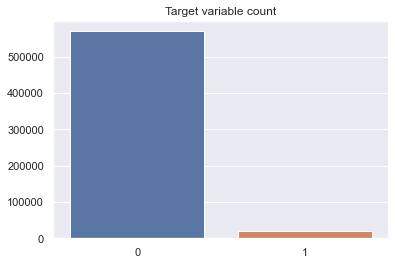

In [0]:
x=train['isFraud'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

In [0]:
train.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [0]:
print("Total Train Features with NaN Values = " + str(train.columns[train.isnull().sum() != 0].size))
if (train.columns[train.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(train.columns[train.isnull().sum() != 0])))
    train[train.columns[train.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Train Features with NaN Values = 75
Features with NaN => ['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [0]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 95 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   TransactionID   590540 non-null  int32   
 1   isFraud         590540 non-null  int8    
 2   TransactionDT   590540 non-null  int32   
 3   TransactionAmt  590540 non-null  float16 
 4   ProductCD       590540 non-null  category
 5   card1           590540 non-null  int16   
 6   card2           581607 non-null  float16 
 7   card3           588975 non-null  float16 
 8   card4           588963 non-null  category
 9   card5           586281 non-null  float16 
 10  card6           588969 non-null  category
 11  addr1           524834 non-null  float16 
 12  addr2           524834 non-null  float16 
 13  dist1           238269 non-null  float16 
 14  dist2           37627 non-null   float16 
 15  P_emaildomain   496084 non-null  category
 16  R_emaildomain   137291 non-null  categ

In [0]:
split = int(len(train) * 0.8)
split

472432

In [0]:
# training_set = train[:split] 
# validation_set = train[split:]

In [0]:
# print(training_set.shape)
# print(validation_set.shape)

In [0]:
# y_train = training_set['isFraud']
# X_train = training_set.drop('isFraud', axis=1)
# y_valid = validation_set['isFraud']
# X_valid = validation_set.drop('isFraud', axis=1)

In [0]:
# print(X_train.shape, y_train.shape)
# print(X_valid.shape, y_valid.shape)

In [0]:
# training_sample = training_set[-100000:]
# y_train_sample = training_sample['isFraud']
# X_train_sample = training_sample.drop('isFraud', axis=1)

In [0]:
from sklearn.model_selection import KFold
import lightgbm as lgb

In [0]:
X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
y = train.sort_values('TransactionDT')['isFraud']

X_test = test.drop(['TransactionDT'], axis=1)

del train, test
gc.collect()

11

In [0]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47,
          'use_missing': True
         }

In [0]:
NFOLDS = 5
folds = KFold(n_splits=NFOLDS)

columns = X.columns
splits = folds.split(X, y)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval=200, early_stopping_rounds=500)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
    y_preds += clf.predict(X_test) / NFOLDS
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {roc_auc_score(y, y_oof)}")

Training until validation scores don't improve for 500 rounds
[200]	training's auc: 0.956991	valid_1's auc: 0.885883
[400]	training's auc: 0.973556	valid_1's auc: 0.900031
[600]	training's auc: 0.984815	valid_1's auc: 0.909197
[800]	training's auc: 0.991083	valid_1's auc: 0.914979
[1000]	training's auc: 0.994633	valid_1's auc: 0.918761
[1200]	training's auc: 0.99678	valid_1's auc: 0.920598
[1400]	training's auc: 0.998042	valid_1's auc: 0.921775
[1600]	training's auc: 0.998777	valid_1's auc: 0.922264
[1800]	training's auc: 0.999246	valid_1's auc: 0.922279
[2000]	training's auc: 0.999534	valid_1's auc: 0.922352
[2200]	training's auc: 0.999716	valid_1's auc: 0.922331
[2400]	training's auc: 0.999818	valid_1's auc: 0.922141
Early stopping, best iteration is:
[1958]	training's auc: 0.999487	valid_1's auc: 0.922404
Fold 1 | AUC: 0.9224038274193269
Training until validation scores don't improve for 500 rounds
[200]	training's auc: 0.956846	valid_1's auc: 0.908521
[400]	training's auc: 0.973657